In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import json
import seaborn as sns
import re

%matplotlib inline

In [3]:
members = pd.read_csv('./data/NSS_GreatCare_Members.csv', low_memory=False)
Inpatient_admissions = pd.read_csv('./data/NSS_Hospital_Inpatient_Admissions.csv')
office_visits = pd.read_csv('./data/NSS_PrimaryCare_Office_Visits.csv')

C:\Users\ag03982\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
members.head()

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,...,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01 00:00:00+00,2013-04-11 00:00:00+00
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,...,0,0,0,0,1,0,0,0,2012-12-10 00:00:00+00,2013-01-01 00:00:00+00
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,...,0,0,0,0,0,0,0,0,2015-04-18 00:00:00+00,2015-05-18 00:00:00+00
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2010-01-01 00:00:00+00,2010-04-09 00:00:00+00
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2012-08-01 00:00:00+00,2012-10-02 00:00:00+00


In [5]:
Inpatient_admissions.head()

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1.417171e+09,1306890389,2013-01-12,2013-01-14,...,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1.669599e+09,1902803315,2014-01-05,2014-01-12,...,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1.407881e+09,1902803315,2012-06-13,2012-06-21,...,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1.407009e+09,1427055839,2012-12-06,2012-12-09,...,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,1.518046e+09,1992818256,2015-03-11,2015-03-14,...,2,1,NaN,NaN,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0


In [6]:
#choosing columns needed
pcp=office_visits[['Patient ID','Provider Group NPI','Service Provider NPI','Encounter Date','Encounter ID']]

In [7]:
pcp.sort_values('Patient ID')

,Patient ID,Provider Group NPI,Service Provider NPI,Encounter Date,Encounter ID
75932,DS1|1,1.083695e+09,1.295710e+09,2013-04-11,COV|PCSL|DS1|1|P|10130|1083694616|1
75933,DS1|1,1.083695e+09,1.922083e+09,2013-11-04,COV|PCSL|DS1|1|P|371880|1083694616|1
75934,DS1|1,1.083695e+09,1.548246e+09,2013-11-21,COV|PCSL|DS1|1|P|659989|1083694616|1
43790,DS1|10,1.083695e+09,1.245670e+09,2013-04-17,COV|PBSL|DS1|10|P|765689|1083694616|1
43784,DS1|10,1.639169e+09,1.457336e+09,2012-08-17,COV|PBSL|DS1|10|P|1070821|1639168594|1
...,...,...,...,...,...
231364,DS1|9999,1.043427e+09,1.235367e+09,2011-04-22,COV|PCSL|DS1|9999|P|192754|1043427248|1
231365,DS1|9999,1.184723e+09,1.851738e+09,2014-10-07,COV|PCSL|DS1|9999|P|494636|1184722779|1
231366,DS1|9999,1.043427e+09,1.407009e+09,2012-11-04,COV|PCSL|DS1|9999|P|642185|1043427248|1
231367,DS1|9999,1.184723e+09,1.851738e+09,2014-12-09,COV|PCSL|DS1|9999|P|818335|1184722779|1


In [8]:
#convert floats to int
#pcp2['Provider Group NPI'] = pcp2['Provider Group NPI'].astype(int)
#pcp.info()

In [9]:
thirtyadm=Inpatient_admissions[['Patient ID','Facility Provider ID','Encounter Start Date','Encounter End Date']]

In [10]:
##renaming columns to be one "word"
thirtyadm.columns = ['patient_id','facility_id','start_date','end_date']
thirtyadm

,patient_id,facility_id,start_date,end_date
0,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14
1,DS1|10043,DS1|NPI|1902803315,2014-01-05,2014-01-12
2,DS1|10073,DS1|NPI|1902803315,2012-06-13,2012-06-21
3,DS1|10101,DS1|NPI|1427055839,2012-12-06,2012-12-09
4,DS1|10118,DS1|NPI|1992818256,2015-03-11,2015-03-14
...,...,...,...,...
6208,DS1|9979,DS1|NPI|1689772592,2015-02-06,2015-02-11
6209,DS1|9981,DS1|NPI|1427055839,2014-08-07,2014-08-10
6210,DS1|9994,DS1|NPI|1689608150,2015-11-21,2015-11-23
6211,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27


In [11]:
#Getting the next admission date for same patient to same line
thirtyadm['next_adm']=thirtyadm.sort_values(by=['start_date'],ascending=True).groupby(['patient_id'])['start_date'].shift(-1)

<ipython-input-11-08d5b4e31d71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirtyadm['next_adm']=thirtyadm.sort_values(by=['start_date'],ascending=True).groupby(['patient_id'])['start_date'].shift(-1)


In [12]:
#testing output
#thirtyadm[thirtyadm['patient_id']=='DS1|9994']b

In [13]:
#Setting dates to datetime
thirtyadm['start_date'] = pd.to_datetime(thirtyadm['start_date'], format='%Y-%m-%d')
thirtyadm['end_date'] = pd.to_datetime(thirtyadm['end_date'], format='%Y-%m-%d')
thirtyadm['next_adm'] =  pd.to_datetime(thirtyadm['next_adm'], format='%Y-%m-%d')
Inpatient_admissions['Encounter Start Date']=pd.to_datetime(Inpatient_admissions['Encounter Start Date'])
pcp['Encounter Date']=pd.to_datetime(pcp['Encounter Date'])

<ipython-input-13-1186e5412a57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirtyadm['start_date'] = pd.to_datetime(thirtyadm['start_date'], format='%Y-%m-%d')
<ipython-input-13-1186e5412a57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirtyadm['end_date'] = pd.to_datetime(thirtyadm['end_date'], format='%Y-%m-%d')
<ipython-input-13-1186e5412a57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [14]:
#Making a new column to calculate the difference of end to readmission
thirtyadm['diff']=thirtyadm['next_adm'] - thirtyadm['end_date']
thirtyadm

<ipython-input-14-a6b7a5f2b821>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirtyadm['diff']=thirtyadm['next_adm'] - thirtyadm['end_date']


,patient_id,facility_id,start_date,end_date,next_adm,diff
0,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT
1,DS1|10043,DS1|NPI|1902803315,2014-01-05,2014-01-12,NaT,NaT
2,DS1|10073,DS1|NPI|1902803315,2012-06-13,2012-06-21,NaT,NaT
3,DS1|10101,DS1|NPI|1427055839,2012-12-06,2012-12-09,NaT,NaT
4,DS1|10118,DS1|NPI|1992818256,2015-03-11,2015-03-14,NaT,NaT
...,...,...,...,...,...,...
6208,DS1|9979,DS1|NPI|1689772592,2015-02-06,2015-02-11,NaT,NaT
6209,DS1|9981,DS1|NPI|1427055839,2014-08-07,2014-08-10,NaT,NaT
6210,DS1|9994,DS1|NPI|1689608150,2015-11-21,2015-11-23,2015-11-24,1 days
6211,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT


In [15]:
pt_readmitted=thirtyadm.dropna()
pt_readmitted

,patient_id,facility_id,start_date,end_date,next_adm,diff
8,DS1|10132,DS1|NPI|1386741635,2013-03-30,2013-04-01,2013-08-14,135 days
18,DS1|10253,DS1|NPI|1396725677,2010-06-02,2010-06-06,2011-10-15,496 days
19,DS1|10253,DS1|NPI|1689772592,2010-04-02,2010-04-16,2010-06-02,47 days
20,DS1|10291,DS1|NPI|1821250762,2010-05-14,2010-05-15,2011-02-24,285 days
34,DS1|10451,DS1|NPI|1023010113,2014-04-24,2014-04-26,2014-05-23,27 days
...,...,...,...,...,...,...
6198,DS1|9935,DS1|NPI|1669456299,2011-01-22,2011-01-24,2011-01-25,1 days
6199,DS1|9935,DS1|NPI|1902803315,2011-01-25,2011-01-26,2011-01-26,0 days
6201,DS1|9943,DS1|NPI|1184722779,2013-10-01,2013-10-16,2013-10-25,9 days
6202,DS1|9943,DS1|NPI|1184722779,2013-10-25,2013-10-28,2014-10-28,365 days


In [16]:
#testing output
#pt_readmitted[pt_readmitted['patient_id']=='DS1|6964']

In [17]:
#Sorting start date
pt_readmitted=pt_readmitted.sort_values('start_date')
pt_readmitted

,patient_id,facility_id,start_date,end_date,next_adm,diff
77,DS1|10734,DS1|NPI|1104982917,2009-11-11,2009-11-25,2010-04-25,151 days
3367,DS1|39675,DS1|NPI|1184722779,2009-11-24,2010-11-30,2011-01-17,48 days
1304,DS1|21571,DS1|NPI|1689608150,2009-11-27,2009-12-02,2010-02-20,80 days
2612,DS1|3294,DS1|NPI|1710065933,2009-11-28,2009-12-08,2010-01-01,24 days
4982,DS1|53976,DS1|NPI|1689772592,2009-11-29,2009-12-01,2009-12-28,27 days
...,...,...,...,...,...,...
4642,DS1|51247,DS1|NPI|1184722779,2018-07-16,2018-07-21,2019-04-09,262 days
5899,DS1|6964,DS1|NPI|1184722779,2018-07-21,2018-11-18,2018-07-21,-120 days
5898,DS1|6964,DS1|NPI|0000000000,2018-07-21,2018-09-18,2018-11-23,66 days
922,DS1|18117,DS1|NPI|1033298617,2018-08-08,2018-08-11,2018-08-08,-3 days


In [18]:
#Dropping negative dates (bad input??)
pt_readmitted=pt_readmitted[pt_readmitted['diff']>='0 days']
pt_readmitted

,patient_id,facility_id,start_date,end_date,next_adm,diff
77,DS1|10734,DS1|NPI|1104982917,2009-11-11,2009-11-25,2010-04-25,151 days
3367,DS1|39675,DS1|NPI|1184722779,2009-11-24,2010-11-30,2011-01-17,48 days
1304,DS1|21571,DS1|NPI|1689608150,2009-11-27,2009-12-02,2010-02-20,80 days
2612,DS1|3294,DS1|NPI|1710065933,2009-11-28,2009-12-08,2010-01-01,24 days
4982,DS1|53976,DS1|NPI|1689772592,2009-11-29,2009-12-01,2009-12-28,27 days
...,...,...,...,...,...,...
3910,DS1|44744,DS1|NPI|1710918545,2018-05-01,2018-05-04,2018-06-12,39 days
282,DS1|12364,DS1|NPI|1528041811,2018-05-02,2018-05-12,2018-05-12,0 days
4642,DS1|51247,DS1|NPI|1184722779,2018-07-16,2018-07-21,2019-04-09,262 days
5898,DS1|6964,DS1|NPI|0000000000,2018-07-21,2018-09-18,2018-11-23,66 days


In [19]:
#Finding patients readmitted before 30 days
pt_readm_thirty=pt_readmitted[pt_readmitted['diff']<= '30 days']
pt_readm_thirty

,patient_id,facility_id,start_date,end_date,next_adm,diff
2612,DS1|3294,DS1|NPI|1710065933,2009-11-28,2009-12-08,2010-01-01,24 days
4982,DS1|53976,DS1|NPI|1689772592,2009-11-29,2009-12-01,2009-12-28,27 days
3804,DS1|43565,DS1|NPI|1801152566,2009-12-09,2009-12-17,2009-12-30,13 days
3166,DS1|37954,DS1|NPI|1689772592,2009-12-16,2009-12-23,2009-12-23,0 days
3169,DS1|37954,DS1|NPI|1871543215,2009-12-23,2010-01-29,2010-02-16,18 days
...,...,...,...,...,...,...
1864,DS1|25963,DS1|NPI|1992818256,2017-09-10,2017-09-14,2017-09-15,1 days
3608,DS1|41795,DS1|NPI|1902803315,2017-12-25,2018-01-07,2018-01-31,24 days
279,DS1|12364,DS1|NPI|1184722779,2018-03-13,2018-03-18,2018-04-04,17 days
280,DS1|12364,DS1|NPI|1184722779,2018-04-04,2018-04-11,2018-05-02,21 days


In [20]:
pt_readm_thirty.count()

patient_id     696
facility_id    696
start_date     696
end_date       696
next_adm       696
diff           696
dtype: int64

In [21]:
#Grouping dates/data in 30 day bins
## official readmission dates in 30 day bins
pt_readm_thirty.groupby(pd.Grouper(key='start_date',freq='BM')).count().dropna()

,patient_id,facility_id,end_date,next_adm,diff
start_date,,,,,
2009-11-30,2,2,2,2,2
2009-12-31,5,5,5,5,5
2010-01-29,1,1,1,1,1
2010-02-26,1,1,1,1,1
2010-03-31,2,2,2,2,2
...,...,...,...,...,...
2018-01-31,0,0,0,0,0
2018-02-28,0,0,0,0,0
2018-03-30,1,1,1,1,1


In [22]:
totaladm =Inpatient_admissions[Inpatient_admissions.columns[0]].count()
totaladm

6213

In [23]:
##Readmission rate is 0.092548 or 11.2%
readmin_rate=(pt_readm_thirty.count())/(Inpatient_admissions[Inpatient_admissions.columns[0]].count())
readmin_rate

patient_id     0.112023
facility_id    0.112023
start_date     0.112023
end_date       0.112023
next_adm       0.112023
diff           0.112023
dtype: float64

# 2. What percent of patients have a PCP visit within a week of discharge?

In [24]:
pcp

,Patient ID,Provider Group NPI,Service Provider NPI,Encounter Date,Encounter ID
0,DS1|10076,1.043427e+09,1.487857e+09,2011-02-18,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779
1,DS1|10088,1.043427e+09,1.528031e+09,2014-02-22,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996
2,DS1|10165,1.043427e+09,1.477579e+09,2014-08-31,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365
3,DS1|10240,1.407059e+09,1.821178e+09,2013-06-17,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088
4,DS1|10293,1.184723e+09,1.609004e+09,2016-09-04,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191
...,...,...,...,...,...
231368,DS1|9999,1.184723e+09,1.851738e+09,2015-02-10,COV|PCSL|DS1|9999|P|91236|1184722779|1
231369,DS1|99,1.043427e+09,1.215163e+09,2011-08-02,COV|PCSL|DS1|99|P|1263621|1043427248|1
231370,DS1|99,1.043427e+09,1.215163e+09,2011-04-13,COV|PCSL|DS1|99|P|22491|1043427248|1
231371,DS1|9,1.962790e+09,1.144252e+09,2014-04-07,COV|PCSL|DS1|9|P|341904|1962790014|1


In [25]:
##merging admissions with pcp to get discharge date
pcp_adm=pd.merge(thirtyadm,pcp,how='inner',left_on=['patient_id'],right_on=['Patient ID'])
pcp_adm

,patient_id,facility_id,start_date,end_date,next_adm,diff,Patient ID,Provider Group NPI,Service Provider NPI,Encounter Date,Encounter ID
0,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.619980e+09,2015-12-08,COV|PBSL|DS1|10033|P|1228384|1043427248|1|SHIFTED
1,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.225216e+09,2012-06-18,COV|PBSL|DS1|10033|P|1326684|1043427248|1|SHIFTED
2,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.619980e+09,2014-06-10,COV|PBSL|DS1|10033|P|155317|1043427248|1|SHIFTED
3,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.366453e+09,2014-09-28,COV|PBSL|DS1|10033|P|439093|1043427248|1|SHIFTED
4,DS1|10033,DS1|NPI|1306890389,2013-01-12,2013-01-14,NaT,NaT,DS1|10033,1.043427e+09,1.619980e+09,2014-03-16,COV|PBSL|DS1|10033|P|711310|1043427248|1|SHIFTED
...,...,...,...,...,...,...,...,...,...,...,...
43786,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT,DS1|9994,1.407059e+09,1.043269e+09,2015-06-22,COV|ICSL|DS1|9994|I|682672|1689608150|6
43787,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT,DS1|9994,1.407059e+09,1.487735e+09,2015-12-05,COV|PCSL|DS1|9994|P|1238517|1407058787|2
43788,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT,DS1|9994,1.407059e+09,1.487735e+09,2015-12-13,COV|PCSL|DS1|9994|P|302749|1407058787|2
43789,DS1|9994,DS1|NPI|1689608150,2015-11-24,2015-11-27,NaT,NaT,DS1|9994,1.205884e+09,1.669553e+09,2014-05-18,COV|PCSL|DS1|9994|P|781849|1205884392|1


In [26]:
pcp_adm=pcp_adm[['Patient ID','end_date','Provider Group NPI','Service Provider NPI','Encounter Date']]

In [27]:
pcp_adm['Days to PCP Visit']=pcp_adm['Encounter Date'] - pcp_adm['end_date']

<ipython-input-27-bbde2e7eaf73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcp_adm['Days to PCP Visit']=pcp_adm['Encounter Date'] - pcp_adm['end_date']


In [28]:
#Finding patients who visited PCP within 7 days of discharge
pcp_seven=pcp_adm[pcp_adm['Days to PCP Visit']<= '7 days']


In [29]:
## Teng's loop 
##for i in inpatient_pcp_df['7_Days']:
#    if (i <= dt.timedelta(days=7)) and (i > dt.timedelta(days=0)) :
#        t.append('yes')
#    else:
#        t.append('no')

In [30]:
pcp_seven=pcp_seven[pcp_seven['Days to PCP Visit']>'0 days']

In [31]:
pcp_seven.drop_duplicates(subset=['Patient ID','end_date'],keep='first')

,Patient ID,end_date,Provider Group NPI,Service Provider NPI,Encounter Date,Days to PCP Visit
28,DS1|10073,2012-06-21,1.043427e+09,1.659394e+09,2012-06-27,6 days
50,DS1|10101,2012-12-09,1.043427e+09,1.952538e+09,2012-12-12,3 days
229,DS1|10303,2012-06-24,1.912988e+09,1.447235e+09,2012-06-30,6 days
245,DS1|10305,2014-05-12,1.184723e+09,1.417113e+09,2014-05-13,1 days
248,DS1|10325,2012-07-07,1.184723e+09,1.417113e+09,2012-07-08,1 days
...,...,...,...,...,...,...
43734,DS1|9943,2014-10-30,1.184723e+09,1.659330e+09,2014-11-03,4 days
43746,DS1|9945,2013-02-11,1.043427e+09,1.164698e+09,2013-02-14,3 days
43761,DS1|9978,2015-09-05,1.043427e+09,1.144275e+09,2015-09-11,6 days
43765,DS1|9979,2015-02-11,1.477666e+09,1.740278e+09,2015-02-15,4 days


In [32]:
pcp_rate=((pcp_seven['Patient ID'].count())/(Inpatient_admissions[Inpatient_admissions.columns[0]].count())*100)

In [33]:
#Percent of patients who saw their PCP within 7 days of discharge
## 38.02
pcp_rate

38.01706100112667

# Question 3. Do either vary by individual or group PCP's?

In [34]:
pcp_seven

,Patient ID,end_date,Provider Group NPI,Service Provider NPI,Encounter Date,Days to PCP Visit
28,DS1|10073,2012-06-21,1.043427e+09,1.659394e+09,2012-06-27,6 days
50,DS1|10101,2012-12-09,1.043427e+09,1.952538e+09,2012-12-12,3 days
229,DS1|10303,2012-06-24,1.912988e+09,1.447235e+09,2012-06-30,6 days
236,DS1|10303,2012-06-24,1.912988e+09,1.164408e+09,2012-06-28,4 days
241,DS1|10303,2012-06-24,1.912988e+09,1.447235e+09,2012-06-25,1 days
...,...,...,...,...,...,...
43746,DS1|9945,2013-02-11,1.043427e+09,1.164698e+09,2013-02-14,3 days
43761,DS1|9978,2015-09-05,1.043427e+09,1.144275e+09,2015-09-11,6 days
43765,DS1|9979,2015-02-11,1.477666e+09,1.740278e+09,2015-02-15,4 days
43768,DS1|9981,2014-08-10,1.043427e+09,1.992932e+09,2014-08-11,1 days


In [35]:
##getting rid of decimal
pcp_seven['Provider Group NPI'] = pcp_seven['Provider Group NPI'].map(lambda x: str(x)[:-2])

In [36]:
##dropping na and retyping as str
pcp_seven['Provider Group NPI'] =pcp_seven['Provider Group NPI'].dropna().astype(str)

In [37]:
pcp_seven=pcp_seven.groupby(['Provider Group NPI']).count().sort_values('Patient ID',ascending=False)

In [38]:
pcp_seven

,Patient ID,end_date,Service Provider NPI,Encounter Date,Days to PCP Visit
Provider Group NPI,,,,,
1043427248,1047,1047,1047,1047,1047
1184722779,565,565,565,565,565
1164512851,267,267,267,267,267
1407058787,88,88,88,88,88
1912987553,67,67,67,67,67
...,...,...,...,...,...
1639107139,1,1,1,1,1
1639168594,1,1,1,1,1
1639254501,1,1,1,1,1


In [39]:
pcp_seven_top=pcp_seven[pcp_seven['Days to PCP Visit']>=50]
pcp_seven_top

,Patient ID,end_date,Service Provider NPI,Encounter Date,Days to PCP Visit
Provider Group NPI,,,,,
1043427248,1047,1047,1047,1047,1047
1184722779,565,565,565,565,565
1164512851,267,267,267,267,267
1407058787,88,88,88,88,88
1912987553,67,67,67,67,67
1316025091,60,60,60,60,60


In [42]:
pcp_seven_top['Provider Group NPI'] =pcp_seven_top['Provider Group NPI'].astype(str)
pcp_seven_top.info()

KeyError: 'Provider Group NPI'

# Q5. What percent of patients don't have PCP or haven't seen PCP recently?

In [44]:
pcp5=pcp[['Patient ID','Service Provider NPI','Provider Group NPI','Encounter Date']]

In [45]:
members1=members[['Patient ID','Patient Age Integer']]

In [46]:
#merge members and pcps
mempcp=pd.merge(members1,pcp5,how='left',left_on=['Patient ID'],right_on=['Patient ID'])

In [47]:
mempcp

,Patient ID,Patient Age Integer,Service Provider NPI,Provider Group NPI,Encounter Date
0,DS1|1,54,1.295710e+09,1.083695e+09,2013-04-11
1,DS1|1,54,1.922083e+09,1.083695e+09,2013-11-04
2,DS1|1,54,1.548246e+09,1.083695e+09,2013-11-21
3,DS1|10,54,1.457336e+09,1.639169e+09,2012-08-17
4,DS1|10,54,1.114213e+09,1.144213e+09,2011-09-15
...,...,...,...,...,...
242153,DS1|9999,41,1.235367e+09,1.043427e+09,2011-04-22
242154,DS1|9999,41,1.851738e+09,1.184723e+09,2014-10-07
242155,DS1|9999,41,1.407009e+09,1.043427e+09,2012-11-04
242156,DS1|9999,41,1.851738e+09,1.184723e+09,2014-12-09


In [48]:
dist_mem=mempcp.drop_duplicates(subset=['Patient ID'])
dist_mem

,Patient ID,Patient Age Integer,Service Provider NPI,Provider Group NPI,Encounter Date
0,DS1|1,54,1.295710e+09,1.083695e+09,2013-04-11
3,DS1|10,54,1.457336e+09,1.639169e+09,2012-08-17
13,DS1|100,2,1.477565e+09,1.043427e+09,2015-10-11
19,DS1|1000,6,1.215163e+09,1.043427e+09,2015-05-03
31,DS1|10000,7,NaN,NaN,NaT
...,...,...,...,...,...
242145,DS1|9995,47,NaN,NaN,NaT
242146,DS1|9996,26,NaN,NaN,NaT
242147,DS1|9997,4,1.225292e+09,1.043427e+09,2012-11-21
242148,DS1|9998,63,1.235159e+09,1.043427e+09,2014-06-13


In [49]:
##finding pt without a PCP assigned
x=dist_mem[dist_mem['Service Provider NPI'].isnull()]

In [50]:
x

,Patient ID,Patient Age Integer,Service Provider NPI,Provider Group NPI,Encounter Date
31,DS1|10000,7,NaN,NaN,NaT
244,DS1|10027,28,NaN,NaN,NaT
245,DS1|10028,4,NaN,NaN,NaT
256,DS1|10030,15,NaN,NaN,NaT
261,DS1|10032,10,NaN,NaN,NaT
...,...,...,...,...,...
242104,DS1|9984,37,NaN,NaN,NaT
242117,DS1|9988,7,NaN,NaN,NaT
242121,DS1|999,12,NaN,NaN,NaT
242145,DS1|9995,47,NaN,NaN,NaT


In [51]:
# percent of patients that do not have a PCP  =18%
noPCP=(x.count())/(dist_mem.count()) * 100
noPCP

Patient ID              18.108227
Patient Age Integer     18.108227
Service Provider NPI     0.000000
Provider Group NPI       0.717476
Encounter Date           0.699728
dtype: float64

# Q6. Are there certain patients we should focus on (e.g. frequent fliers)?

In [53]:
#merge members and admissions
mem_adm=pd.merge(members,Inpatient_admissions,how='left',left_on=['Patient ID'],right_on=['Patient ID'])
mem_adm

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,...,1,1.0,21.0,NaN,NaN,K35.2,Acute appendicitis with generalized peritonitis,0.0,29219.0,250.0
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63026,DS1|9995,DS1|5047W,DS1|1,1,47,1963-07-26,92104.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63027,DS1|9996,DS1|5047X,DS1|1,1,26,1983-04-17,94122.0,0,NaN,NaN,...,2,1.0,NaN,NaN,NaN,O86.12,Endometritis following delivery,0.0,0.0,0.0
63028,DS1|9997,DS1|5047W,DS1|1,1,4,2008-12-11,92840.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63029,DS1|9998,DS1|5047X,DS1|1,1,63,1954-05-23,94939.0,1,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
mem_adms=mem_adm[['Patient ID','Encounter Start Date']]

In [55]:
freq_fliers=mem_adms.groupby(['Patient ID']).count()

In [56]:
freq_fliers.sort_values('Encounter Start Date',ascending=False)

,Encounter Start Date
Patient ID,
DS1|3812,17
DS1|26751,15
DS1|53241,13
DS1|10451,12
DS1|24041,11
...,...
DS1|29196,0
DS1|29197,0
DS1|29198,0


In [57]:
freq_fliers['Encounter Start Date'].mean()

0.10099318909605162

In [58]:
freq_fliers=freq_fliers[freq_fliers['Encounter Start Date']>7]

In [59]:
#count of patients who had encounter with hospital more than 7 times 11/10/2009 to 4/28/2019
freq_fliers.sort_values('Encounter Start Date',ascending=False)

,Encounter Start Date
Patient ID,
DS1|3812,17
DS1|26751,15
DS1|53241,13
DS1|10451,12
DS1|24041,11
DS1|21926,11
DS1|12422,11
DS1|6506,10
DS1|32814,9


Text(0, 0.5, 'Patient ID')

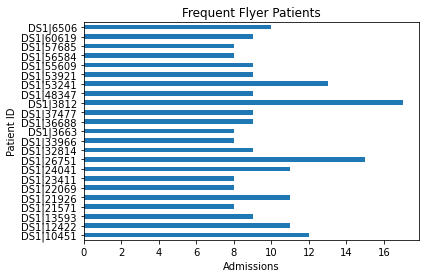

In [60]:
ax = freq_fliers.plot.barh(rot=0,legend=False)
plt.title("Frequent Flyer Patients")
plt.xlabel("Admissions")
plt.ylabel("Patient ID")